# Data Mining II - Market Basket Analysis

The point of this project is to add vital tools to the data analytics arsenal that incorporates unsupervised models. This project explains when, how, and why to use these tools to best meet organizational needs. As organizations generate exponentially more data each year, it is vitally important that they can use this data in ways that help drive toward their goals. Data mining is the process of discovering patterns and correlations within large sets of data. Organizations can then use these patterns or correlations to accurately predict outcomes, identify significant variables, or to perform lift analysis. Information technology professionals with skills in data mining are increasingly in demand to help organizations maximize the value of the organization’s data. In this course you will use Python or R to apply clustering techniques, implement dimensional reduction methods, and predict patterns in data using market basket analysis.

In [ ]:
## Competencies 
__Clustering Techniques__ <br>
Applies clustering techniques to accurately predict outcomes of interest.

## Write Up 
__Research Question__ <br>
What medications are commonly prescribed together with Carvedilol?

__Goals__ <br>
What medications are commonly prescribed together with Carvedilol?

__Explanation of Market Basket Analysis__ <br>
Market basket analysis is a tool used to gather information about purchase behavior in customers or in our case prescription use for patients. “The technique uncovers hidden correlations that cannot be identified by the human eye by using a set of statistical rules to identify product combinations that occur frequently in transactions.” (Selvaraj, 2023) Market basket analyzes the selected data set through the following steps: collect data, clean and preprocess data, association rules, and metrics. 

1. Data Collection – Data collection is not necessary in our case as the data set it provided prior to the analysis. 
2. Cleaning and Preprocessing – Addressing missing values is always necessary when it comes to data analysis. It is also necessary to make sure the data is suitable for import into our apriori algorithm using the TransactionEncoder to convert to a list of lists. 
3. Association Rules – The apriori algorithm will be used to, “identify frequent item sets, sets of items often appearing together in a transaction.” (Kadlaskar, 2021)
4. Metrics – Metrics support, lift, and confidence will be used to evaluate and interpret the association between prescriptions. 

The expected outcomes of market basket analysis are to look at the association of prescription use within patients. 


__Summary of Assumptions__ <br>
One assumptions of market basket analysis would be the consistent nature of products or items throughout the analysis. Market basket analysis does not account for shifts in product supply and assumes a consistent flow of availability. 

## Code

In [5]:
# Import packages 
import pandas as pd 
import numpy as np

In [6]:
# Importing CSV file and creating data frame 
med_basket = pd.read_csv("C:/Users/Makayla Avendano/Desktop/medical_market_basket.csv")

In [7]:
# Looking at data 
med_basket.head(5)

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Looking at shape of the data 
med_basket.shape

(15002, 20)

In [9]:
# Drop blank rows 
med_basket = med_basket[med_basket['Presc01'].notna()]
med_basket.shape

(7501, 20)

In [10]:
# Import TransactionEncoder to transform original data
from mlxtend.preprocessing import TransactionEncoder

# Data frame converted to list of lists 
rows = []
for i in range(0,7501):
    rows.append([str(med_basket.values[i,j])
for j in range(0,20)])

In [11]:
# Putting list into the Transaction encoder 
DE = TransactionEncoder()
array = DE.fit(rows).transform(rows)

In [12]:
# Return array to DataFrame 
transaction = pd.DataFrame(array, columns= DE.columns_)
print(transaction) 

      Duloxetine  Premarin    Yaz  abilify  acetaminophen  actonel  \
0          False     False  False     True          False    False   
1          False     False  False    False          False    False   
2          False     False  False    False          False    False   
3          False     False  False    False          False    False   
4          False     False  False     True          False    False   
...          ...       ...    ...      ...            ...      ...   
7496       False     False  False    False          False    False   
7497       False     False  False    False          False    False   
7498       False     False  False    False          False    False   
7499       False     False  False    False          False    False   
7500       False     False  False    False          False    False   

      albuterol HFA  albuterol aerosol  alendronate  allopurinol  ...  \
0              True               True        False         True  ...   
1            

In [13]:
# Remove NAN column from dataset 
cleaned_df = transaction.drop(['nan'], axis=1)
cleaned_df.head(7505)

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Export CSV file 
cleaned_df.to_csv('cleaned_task3.csv', index=False) 
cleaned_df.columns

Index(['Duloxetine', 'Premarin', 'Yaz', 'abilify', 'acetaminophen', 'actonel',
       'albuterol HFA', 'albuterol aerosol', 'alendronate', 'allopurinol',
       ...
       'trazodone HCI', 'triamcinolone Ace topical', 'triamterene',
       'trimethoprim DS', 'valaciclovir', 'valsartan', 'venlafaxine XR',
       'verapamil SR', 'viagra', 'zolpidem'],
      dtype='object', length=119)

In [15]:
# Mining the data 
from mlxtend.frequent_patterns import apriori 
from mlxtend.frequent_patterns import association_rules 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
# Load the clean data CSV 
data_clean = pd.read_csv("C:/Users/Makayla Avendano/Desktop/cleaned_task3.csv")

In [17]:
data_clean.head()

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
data_clean.shape

(7501, 119)

In [19]:
# 5 most popular prescriptions 
count = data_clean.sum()
top_prescrip = count.sort_values(ascending=False).head(5)
top_prescrip = top_prescrip.to_frame()
top_prescrip = top_prescrip.reset_index()
top_prescrip = top_prescrip.rename(columns={'index': 'Prescription', 0: 'count'})

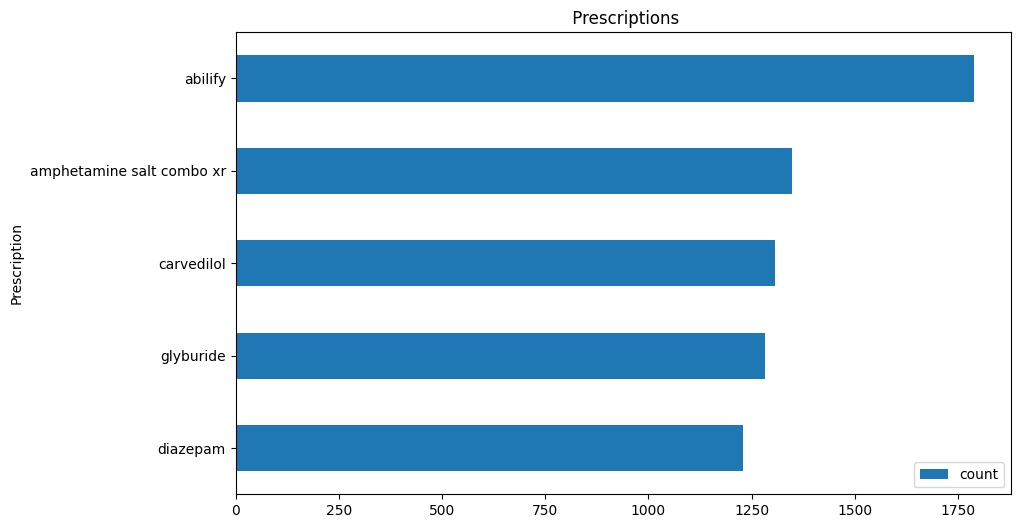

In [20]:
# Data Visualization of the 5 most popular products 
plt. rcParams['figure.figsize'] = (10,6) 
ax = top_prescrip.plot.barh(x = 'Prescription', y = 'count')
plt.title(' Prescriptions') 
plt.gca().invert_yaxis()

In [21]:
# Creating the Apriori object called rules 
rules = apriori(data_clean, min_support=0.02, use_colnames=True)
rules.head(5)

,support,itemsets
0,0.046794,(Premarin)
1,0.238368,(abilify)
2,0.020397,(albuterol aerosol)
3,0.033329,(allopurinol)
4,0.079323,(alprazolam)


In [22]:
# Creating the rules table 
rul_table = association_rules(rules, metric='lift',min_threshold=1)
rul_table.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(abilify),(amlodipine),0.238368,0.071457,0.023597,0.098993,1.385352,0.006564,1.030562,0.365218
1,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144,0.299568
2,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
3,(amphetamine salt combo),(abilify),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
4,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
5,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
6,(abilify),(atorvastatin),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850,0.467950
7,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
8,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
9,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606


## Confidence
Confidence is more specific than support and focuses on the strength of the association between items. “In this case, it’s the proportion of all the transactions that contain all the items in the itemset over the proportion of transactions containing just one of them.” (Sivek, 2020) The higher and closer to 1, the better the metric. The top three rules according to the confidence metric are listed in the photo and table to the right. Given that a patient has a prescription for Metformin, there is a 45% chance the patient will also be prescribed Abilify. 

In [23]:
# Sorting rules by metric
top_three_rules = rul_table.sort_values('confidence', ascending=False).head(3)
print(top_three_rules)

     antecedents consequents  antecedent support  consequent support  \
31   (metformin)   (abilify)            0.050527            0.238368   
25   (glipizide)   (abilify)            0.065858            0.238368   
29  (lisinopril)   (abilify)            0.098254            0.238368   

     support  confidence      lift  leverage  conviction  zhangs_metric  
31  0.023064    0.456464  1.914955  0.011020    1.401255       0.503221  
25  0.027596    0.419028  1.757904  0.011898    1.310962       0.461536  
29  0.040928    0.416554  1.747522  0.017507    1.305401       0.474369  


## Lift
“The lift metric lets us know whether our assumption of “no relationship” between the items – that they are independent – is reality or not.” (Sivek, 2020) With lift, if the metric is greater than 1 the antecedent is increasing the likelihood of the consequent being purchased (or prescribed). If less than 1, the opposite is true. The top three rules according to the lift metric are listed in the photo and table to the right. Carvedilol and Lisinopril show a strong association. If Carvedilol is prescribed, they are 2.29 times more likely to be prescribed Lisinopril as well. 

In [24]:
top_three_rules = rul_table.sort_values('lift', ascending=False).head(3)
print(top_three_rules)

     antecedents   consequents  antecedent support  consequent support  \
74  (carvedilol)  (lisinopril)            0.174110            0.098254   
75  (lisinopril)  (carvedilol)            0.098254            0.174110   
73   (glipizide)  (carvedilol)            0.065858            0.174110   

     support  confidence      lift  leverage  conviction  zhangs_metric  
74  0.039195    0.225115  2.291162  0.022088    1.163716       0.682343  
75  0.039195    0.398915  2.291162  0.022088    1.373997       0.624943  
73  0.022930    0.348178  1.999758  0.011464    1.267048       0.535186  


## Support
Support is the simplest metric and is defined as the proportion of all transactions that contain an association rule. (Sivek, 2020) The higher and closer to 1, the better the metric. The top three rules according to the support metric are listed in the photo and table to the right. The association Carvedilol then Abilify appears to happen 6% of the time throughout all transactions. With Diazepam then Abilify occurring 5% of the time throughout the transactions. 

In [25]:
top_three_rules = rul_table.sort_values('support', ascending=False).head(3)
print(top_three_rules)

     antecedents   consequents  antecedent support  consequent support  \
8   (carvedilol)     (abilify)            0.174110            0.238368   
9      (abilify)  (carvedilol)            0.238368            0.174110   
19    (diazepam)     (abilify)            0.163845            0.238368   

     support  confidence      lift  leverage  conviction  zhangs_metric  
8   0.059725    0.343032  1.439085  0.018223    1.159314       0.369437  
9   0.059725    0.250559  1.439085  0.018223    1.102008       0.400606  
19  0.052660    0.321400  1.348332  0.013604    1.122357       0.308965  


In [26]:
sorted_rules = rul_table[(rul_table['lift'] > 0.08)]
sorted_rules.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(abilify),(amlodipine),0.238368,0.071457,0.023597,0.098993,1.385352,0.006564,1.030562,0.365218
1,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144,0.299568
2,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627


## Practical Significance 
Having a high lift value for Carvedilol and Lisinopril indicates that the association is high, but why? Carvedilol is a beta blocker that treats high blood pressure and slows down your heart rate and blood flow. Lisinopril is an ace inhibitor that also treats high blood pressure and heart failure. Now with more context, it is understandable why the lift for these medications is so high due to the patient most likely benefiting more by being prescribed both instead of just one by itself. This could also lead to further research on whether it is beneficial to have both prescribed or if we could potentially lower costs by optimizing treatment protocols. On the other hand, Carvedilol and Glipizide are not necessarily meant to be prescribed together and may potentially be prescribed at separate times or may be prescribed due to having both diabetes and high blood pressure. We can use this information to ask more questions pertaining to potential drug interactions and patient safety.  

## Course of Action
A course of action would be to ask more questions based on commonly prescribed medications. This hospital can use this information to optimize treatment protocols and make sure the most effective treatment is being used while looking at costs. Carvedilol is highly associated with both Lisinopril and Glipizide. Are these interactions safe for the patient? Are there more suitable prescription combinations that are both safe and cost effective for high blood pressure? Is there a prescription that is better for both diabetes and high blood pressure? 